# Finding the elbow or knee of a curve
In some data analysis, its important to identify one or more "knees" or "elbows" —operating points, based on recent trends, where the perceived cost to alter a system parameter is no longer worth the expected performance benefit. Usually a visual inspection provides a rough estimate of such points. This implementation provides a mathematical solution to identify the knee automatically.

In this solution, we draw a line from the first point in the curve to the last and find the point on the curve which has the greatest distance from the line drawn. 
<img src="https://i.stack.imgur.com/IoRbN.png">

These links provide more details

https://www1.icsi.berkeley.edu/~barath/papers/kneedle-simplex11.pdf

https://stackoverflow.com/questions/2018178/finding-the-best-trade-off-point-on-a-curve


The following hidden cell contains function read_file which has credentials for accessing the data file from object storage. This would be hidden when shared.

In [1]:
# The code was removed by DSX for sharing.

Read the csvfile containing the data. The file contains a single column "values" which is a list of float values. There are 6579 values and range from 0-100.

In [6]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import pandas as pd
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

# if you are reading from a local file, replace with following line
# df = pd.read_csv('dataseries.csv')
df = pd.read_csv(read_file('RandomNotebooks', 'dataseries.csv'))

print "Sample Data" 
print df.head()
print df.describe()

Sample Data
      values
0   3.717326
1   7.320842
2  10.763359
3  13.817719
4  16.342817
            values
count  6579.000000
mean     95.713226
std       8.081120
min       3.717326
25%      95.879251
50%      98.336341
75%      99.239186
max     100.000000


In [3]:
# pull out the list from pandas frame
values=list(df['values'])

#get coordinates of all the points
nPoints = len(values)
allCoord = np.vstack((range(nPoints), values)).T
#np.array([range(nPoints), values])

# get the first point
firstPoint = allCoord[0]
# get vector between first and last point - this is the line
lineVec = allCoord[-1] - allCoord[0]
lineVecNorm = lineVec / np.sqrt(np.sum(lineVec**2))

# find the distance from each point to the line:
# vector between all points and first point
vecFromFirst = allCoord - firstPoint

# To calculate the distance to the line, we split vecFromFirst into two 
# components, one that is parallel to the line and one that is perpendicular 
# Then, we take the norm of the part that is perpendicular to the line and 
# get the distance.
# We find the vector parallel to the line by projecting vecFromFirst onto 
# the line. The perpendicular vector is vecFromFirst - vecFromFirstParallel
# We project vecFromFirst by taking the scalar product of the vector with 
# the unit vector that points in the direction of the line (this gives us 
# the length of the projection of vecFromFirst onto the line). If we 
# multiply the scalar product by the unit vector, we have vecFromFirstParallel
scalarProduct = np.sum(vecFromFirst * np.matlib.repmat(lineVecNorm, nPoints, 1), axis=1)
vecFromFirstParallel = np.outer(scalarProduct, lineVecNorm)
vecToLine = vecFromFirst - vecFromFirstParallel

# distance to line is the norm of vecToLine
distToLine = np.sqrt(np.sum(vecToLine ** 2, axis=1))

# knee/elbow is the point with max distance value
idxOfBestPoint = np.argmax(distToLine)

print "Knee of the curve is at index =",idxOfBestPoint
print "Knee value =", values[idxOfBestPoint]

Knee of the curve is at index = 638
Knee value = 89.63081194


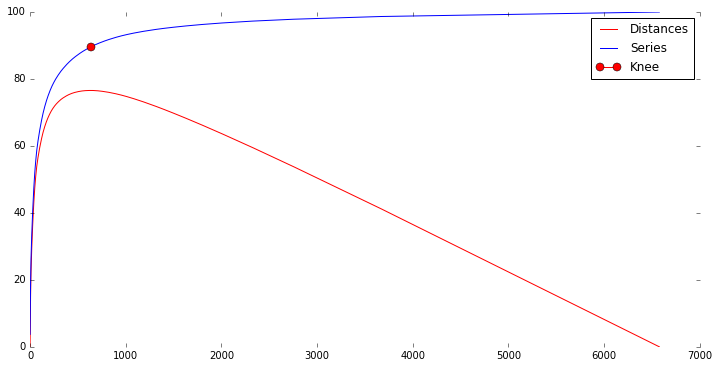

In [4]:
# plot of the original curve and its corresponding distances
plt.figure(figsize=(12,6))
plt.plot(distToLine,label='Distances',color='r')
plt.plot(values,label='Series',color='b')
plt.plot([idxOfBestPoint], values[idxOfBestPoint], marker='o', markersize=8, color="red", label='Knee')
plt.legend()
plt.show()